In [1]:
%reset -f
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
dirToInclude=parentdir +'/features/'
print dirToInclude
sys.path.insert(0,dirToInclude) 

import IeegConsts
from IeegConsts import *
from IeegFeatures import *

import pandas
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
import matplotlib.pyplot as plt
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

%matplotlib inline

np.set_printoptions(precision=4, threshold=10000, linewidth=100, edgeitems=999, suppress=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 100)
pd.set_option('expand_frame_repr', False)
pd.set_option('precision', 6)
    
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import pandas
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
# #http://rcarneva.github.io/understanding-gradient-boosting-part-1.html
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

#-------------------------MLEXTND-------------------------------#
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
dirToInclude=parentdir +'/features/'
print dirToInclude
sys.path.insert(0,dirToInclude) 

import IeegConsts
from IeegConsts import *
from IeegFeatures import *

import pandas
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
import matplotlib.pyplot as plt
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import pandas
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
# #http://rcarneva.github.io/understanding-gradient-boosting-part-1.html
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

#-------------------------MLEXTND-------------------------------#
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

    
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train_dir=TRAIN_DATA_FOLDER_IN_ALL
test_dir=TEST_DATA_FOLDER_IN_ALL    

ieegFeatures= IeegFeatures(train_dir, True)
df_cols_train=ieegFeatures.ieegGenCols()
print len(df_cols_train)

def dropBadFiles(df):
    print df.shape
    bad_files = pandas.read_csv("train_and_test_data_labels_safe.csv", engine='python')

    print 'Start shape:' + str(df.shape)
    for index, row in bad_files.iterrows():
        safe = str(row['safe'])  # file name
        if safe=='0':
            f_name = row['image']  # file name
            # print 'droping:' + str(f_name)
            df = df.drop(df[df.file ==f_name].index)

    print 'Final shape:' + str(df.shape)
    return df

# F_NAME_TRAIN= TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL +'-feat_TRAIN_df.csv'
# X_df_train=pandas.read_csv(F_NAME_TRAIN, engine='python') 
# X_df_train.drop('Unnamed: 0', axis=1, inplace=True)
# X_df_train.to_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
#                   + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)


X_df_train= pd.read_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
                  + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)

X_df_train_SINGLE=X_df_train.copy(deep=True)
X_df_train_SINGLE = dropBadFiles(X_df_train_SINGLE)

answers_1_SINGLE = list (X_df_train_SINGLE[singleResponseVariable].values)
answers_1_SINGLE= map(int, answers_1_SINGLE)
X_df_train_SINGLE = X_df_train_SINGLE.drop(singleResponseVariable, axis=1)
X_df_train_SINGLE.drop('id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file', axis=1, inplace=True)
X_df_train_SINGLE.drop('patient_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file_size', axis=1, inplace=True)
X_df_train_SINGLE.drop('sequence_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('segment', axis=1, inplace=True)
X_df_train_SINGLE=X_df_train_SINGLE.apply(lambda x: pandas.to_numeric(x, errors='ignore'))
X_df_train_SINGLE.head(3)

/Volumes/3pt-enc/db/Dropbox/dev/books/mf-msc/mcmc2/seizure-33/python/features/
/Volumes/3pt-enc/db/Dropbox/dev/books/mf-msc/mcmc2/seizure-33/python/features/
Starting:ieegFeatures:2016-11-11 11:32:14.841267
Cols:1239
1239
(5971, 1239)
Start shape:(5971, 1239)
Final shape:(4699, 1239)


,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,mean_11,mean_12,mean_13,mean_14,mean_15,mean_16,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,median_9,median_10,median_11,median_12,median_13,median_14,median_15,median_16,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,std_9,std_10,std_11,std_12,std_13,std_14,std_15,std_16,skew_1,skew_2,skew_3,skew_4,skew_5,skew_6,skew_7,skew_8,skew_9,skew_10,skew_11,skew_12,skew_13,skew_14,skew_15,skew_16,kurt_1,kurt_2,kurt_3,kurt_4,kurt_5,kurt_6,kurt_7,kurt_8,kurt_9,kurt_10,kurt_11,kurt_12,kurt_13,kurt_14,kurt_15,kurt_16,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,m6_1,m6_2,m6_3,m6_4,m6_5,m6_6,m6_7,m6_8,m6_9,m6_10,m6_11,m6_12,m6_13,m6_14,m6_15,m6_16,m4_1,m4_2,m4_3,m4_4,m4_5,m4_6,m4_7,m4_8,m4_9,m4_10,m4_11,m4_12,m4_13,m4_14,m4_15,m4_16,psd_1,psd_2,psd_3,psd_4,psd_5,psd_6,psd_7,psd_8,psd_9,psd_10,psd_11,psd_12,psd_13,psd_14,psd_15,psd_16,psd_17,psd_18,psd_19,psd_20,psd_21,psd_22,psd_23,psd_24,psd_25,psd_26,psd_27,psd_28,psd_29,psd_30,psd_31,psd_32,psd_33,psd_34,psd_35,psd_36,psd_37,psd_38,psd_39,psd_40,psd_41,psd_42,psd_43,psd_44,psd_45,psd_46,psd_47,psd_48,psd_49,psd_50,psd_51,psd_52,psd_53,psd_54,psd_55,psd_56,psd_57,psd_58,psd_59,psd_60,psd_61,psd_62,psd_63,psd_64,psd_65,psd_66,psd_67,psd_68,psd_69,psd_70,psd_71,psd_72,psd_73,psd_74,psd_75,psd_76,psd_77,psd_78,psd_79,psd_80,psd_81,psd_82,psd_83,psd_84,psd_85,psd_86,psd_87,psd_88,psd_89,psd_90,psd_91,psd_92,psd_93,psd_94,psd_95,psd_96,psd_97,psd_98,psd_99,psd_100,psd_101,psd_102,psd_103,psd_104,psd_105,psd_106,psd_107,psd_108,psd_109,psd_110,psd_111,psd_112,psd_113,psd_114,psd_115,psd_116,psd_117,psd_118,psd_119,psd_120,psd_121,psd_122,psd_123,psd_124,psd_125,psd_126,psd_127,psd_128,psd_129,psd_130,psd_131,psd_132,psd_133,psd_134,psd_135,psd_136,psd_137,psd_138,psd_139,psd_140,psd_141,psd_142,psd_143,psd_144,psd_145,psd_146,psd_147,psd_148,psd_149,psd_150,psd_151,psd_152,psd_153,psd_154,psd_155,psd_156,psd_157,psd_158,psd_159,psd_160,psd_161,psd_162,psd_163,psd_164,psd_165,psd_166,psd_167,psd_168,psd_169,psd_170,psd_171,psd_172,psd_173,psd_174,psd_175,psd_176,psd_177,psd_178,psd_179,psd_180,psd_181,psd_182,psd_183,psd_184,psd_185,psd_186,psd_187,psd_188,psd_189,psd_190,psd_191,psd_192,AR_1,AR_2,AR_3,AR_4,AR_5,AR_6,AR_7,AR_8,AR_9,AR_10,AR_11,AR_12,AR_13,AR_14,AR_15,AR_16,AR_17,AR_18,AR_19,AR_20,AR_21,AR_22,AR_23,AR_24,AR_25,AR_26,AR_27,AR_28,AR_29,AR_30,AR_31,AR_32,AR_33,AR_34,AR_35,AR_36,AR_37,AR_38,AR_39,AR_40,AR_41,AR_42,AR_43,AR_44,AR_45,AR_46,AR_47,AR_48,AR_49,AR_50,AR_51,AR_52,AR_53,AR_54,AR_55,AR_56,AR_57,AR_58,AR_59,AR_60,AR_61,AR_62,AR_63,AR_64,AR_65,AR_66,AR_67,AR_68,AR_69,AR_70,AR_71,AR_72,AR_73,AR_74,AR_75,AR_76,AR_77,AR_78,AR_79,AR_80,AR_81,AR_82,AR_83,AR_84,AR_85,AR_86,AR_87,AR_88,AR_89,AR_90,AR_91,AR_92,AR_93,AR_94,AR_95,AR_96,AR_97,AR_98,AR_99,AR_100,AR_101,AR_102,AR_103,AR_104,AR_105,AR_106,AR_107,AR_108,AR_109,AR_110,AR_111,AR_112,AR_113,AR_114,AR_115,AR_116,AR_117,AR_118,AR_119,AR_120,AR_121,AR_122,AR_123,AR_124,AR_125,AR_126,AR_127,AR_128,AR_129,AR_130,AR_131,AR_132,AR_133,AR_134,AR_135,AR_136,AR_137,AR_138,AR_139,AR_140,AR_141,AR_142,AR_143,AR_144,AR_145,AR_146,AR_147,AR_148,AR_149,AR_150,AR_151,AR_152,AR_153,AR_154,AR_155,AR_156,AR_157,AR_158,AR_159,AR_160,AR_161,AR_162,AR_163,AR_164,AR_165,AR_166,AR_167,AR_168,AR_169,AR_170,AR_171,AR_172,AR_173,AR_174,AR_175,AR_176,AR_177,AR_178,AR_179,AR_180,AR_181,AR_182,AR_183,AR_184,AR_185,AR_186,AR_187,AR_188,AR_189,AR_190,AR_191,AR_192,AR_193,AR_194,AR_195,AR_196,AR_197,AR_198,AR_199,AR_200,AR_201,AR_202,AR_203,AR_204,AR_205,AR_206,AR_207,AR_208,AR_209,AR_210,AR_211,AR_212,AR_213,AR_214,AR_215,AR_216,AR_217,AR_218,AR_219,AR_220,AR_221,AR_222,AR_223,AR_224,AR_225,AR_226,AR_227,AR_228,AR_229,AR_230,AR_231,AR_232,AR_233,AR_234,AR_235,AR_236,AR_237,AR_238,AR_239,AR_240,AR_241,AR_242,AR_243,AR_244,AR_245,AR_246,AR_247,AR_248,AR_249,AR_250,AR_251,AR_252,AR_253,AR_254,AR_255,AR_256

In [2]:
cols = list()
n=n_16
for i in range(1, n + 1):
    cols.append('mean_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('median_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('std_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('skew_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('kurt_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('var_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('m6_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('m4_{}'.format(i))
for i in range(1, n_psd + 1):
    cols.append('psd_{}'.format(i))
# for i in range(1, n_AR + 1):
#     cols.append('AR_{}'.format(i))
for i in range(1, n_corr_coeff + 1):
    cols.append('corcoef_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('hurst_{}'.format(i))
# for i in range(1,  n_plv+ 1):
#     cols.append('plv_{}'.format(i))
# for i in range(1, n_p_corr + 1):
#     cols.append('cpc_{}'.format(i))

last_cols=cols

Running:XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0.017, learning_rate=0.15, max_delta_step=0, max_depth=9,
       min_child_weight=3, missing=None, n_estimators=3000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=1, subsample=0.9)shape:(4699, 1232)
(5971, 1239)
Start shape:(5971, 1239)
Final shape:(4699, 1239)
ROC AUC:0.952975607609
LOG LOSS:0.187614628862


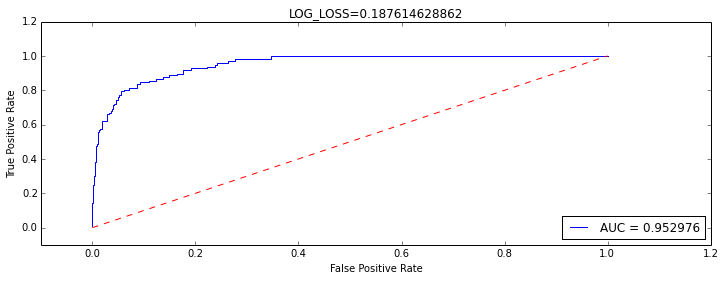

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,mean_11,mean_12,mean_13,mean_14,mean_15,mean_16,psd_1,psd_2,psd_3,psd_4,psd_5,psd_6,psd_7,psd_8,psd_9,psd_10,psd_11,psd_12,psd_13,psd_14,psd_15,psd_16,psd_17,psd_18,psd_19,psd_20,psd_21,psd_22,psd_23,psd_24,psd_25,psd_26,psd_27,psd_28,psd_29,psd_30,psd_31,psd_32,psd_33,psd_34,psd_35,psd_36,psd_37,psd_38,psd_39,psd_40,psd_41,psd_42,psd_43,psd_44,psd_45,psd_46,psd_47,psd_48,psd_49,psd_50,psd_51,psd_52,psd_53,psd_54,psd_55,psd_56,psd_57,psd_58,psd_59,psd_60,psd_61,psd_62,psd_63,psd_64,psd_65,psd_66,psd_67,psd_68,psd_69,psd_70,psd_71,psd_72,psd_73,psd_74,psd_75,psd_76,psd_77,psd_78,psd_79,psd_80,psd_81,psd_82,psd_83,psd_84,psd_85,psd_86,psd_87,psd_88,psd_89,psd_90,psd_91,psd_92,psd_93,psd_94,psd_95,psd_96,psd_97,psd_98,psd_99,psd_100,psd_101,psd_102,psd_103,psd_104,psd_105,psd_106,psd_107,psd_108,psd_109,psd_110,psd_111,psd_112,psd_113,psd_114,psd_115,psd_116,psd_117,psd_118,psd_119,psd_120,psd_121,psd_122,psd_123,psd_124,psd_125,psd_126,psd_127,psd_128,psd_129,psd_130,psd_131,psd_132,psd_133,psd_134,psd_135,psd_136,psd_137,psd_138,psd_139,psd_140,psd_141,psd_142,psd_143,psd_144,psd_145,psd_146,psd_147,psd_148,psd_149,psd_150,psd_151,psd_152,psd_153,psd_154,psd_155,psd_156,psd_157,psd_158,psd_159,psd_160,psd_161,psd_162,psd_163,psd_164,psd_165,psd_166,psd_167,psd_168,psd_169,psd_170,psd_171,psd_172,psd_173,psd_174,psd_175,psd_176,psd_177,psd_178,psd_179,psd_180,psd_181,psd_182,psd_183,psd_184,psd_185,psd_186,psd_187,psd_188,psd_189,psd_190,psd_191,psd_192,corcoef_1,corcoef_2,corcoef_3,corcoef_4,corcoef_5,corcoef_6,corcoef_7,corcoef_8,corcoef_9,corcoef_10,corcoef_11,corcoef_12,corcoef_13,corcoef_14,corcoef_15,corcoef_16,corcoef_17,corcoef_18,corcoef_19,corcoef_20,corcoef_21,corcoef_22,corcoef_23,corcoef_24,corcoef_25,corcoef_26,corcoef_27,corcoef_28,corcoef_29,corcoef_30,corcoef_31,corcoef_32,corcoef_33,corcoef_34,corcoef_35,corcoef_36,corcoef_37,corcoef_38,corcoef_39,corcoef_40,corcoef_41,corcoef_42,corcoef_43,corcoef_44,corcoef_45,corcoef_46,corcoef_47,corcoef_48,corcoef_49,corcoef_50,corcoef_51,corcoef_52,corcoef_53,corcoef_54,corcoef_55,corcoef_56,corcoef_57,corcoef_58,corcoef_59,corcoef_60,corcoef_61,corcoef_62,corcoef_63,corcoef_64,corcoef_65,corcoef_66,corcoef_67,corcoef_68,corcoef_69,corcoef_70,corcoef_71,corcoef_72,corcoef_73,corcoef_74,corcoef_75,corcoef_76,corcoef_77,corcoef_78,corcoef_79,corcoef_80,corcoef_81,corcoef_82,corcoef_83,corcoef_84,corcoef_85,corcoef_86,corcoef_87,corcoef_88,corcoef_89,corcoef_90,corcoef_91,corcoef_92,corcoef_93,corcoef_94,corcoef_95,corcoef_96,corcoef_97,corcoef_98,corcoef_99,corcoef_100,corcoef_101,corcoef_102,corcoef_103,corcoef_104,corcoef_105,corcoef_106,corcoef_107,corcoef_108,corcoef_109,corcoef_110,corcoef_111,corcoef_112,corcoef_113,corcoef_114,corcoef_115,corcoef_116,corcoef_117,corcoef_118,corcoef_119,corcoef_120
2984,-0.031448,-0.066961,0.062421,-0.146628,0.027585,-0.191019,-0.087369,-0.284528,-0.165378,-0.305020,-0.236615,0.178397,0.516358,0.353451,0.360039,0.016713,-0.254156,-0.234795,-0.190603,0.087541,-0.268331,-0.274296,-0.227706,-0.341502,-0.256974,-0.109325,-0.095740,-0.021247,0.165889,0.136247,0.122287,-0.180140,-0.437305,-0.486193,-0.418006,-0.309771,-0.504093,-0.516513,-0.492170,-0.478799,-0.418599,-0.260127,-0.313716,-0.349207,-0.086698,-0.209658,-0.117171,-0.501015,-0.685222,-0.767136,-0.703404,-0.641379,-0.799245,-0.835168,-0.676819,-0.723025,-0.639505,-0.541220,-0.601722,-0.752846,-0.363392,-0.480320,-0.406243,-0.808607,-0.769820,-0.832253,-0.796133,-0.711020,-0.875370,-0.916949,-0.741763,-0.791316,-0.714524,-0.609637,-0.653430,-0.846793,-0.435746,-0.532962,-0.460236,-0.890571,-0.818256,-0.887292,-0.861927,-0.784843,-0.946148,-1.002182,-0.801175,-0.847247,-0.761614,-0.643823,-0.708008,-0.933761,-0.488326,-0.583924,-0.520938,-0.965631,-0.865031,-1.010508,-1.000435,-1.036134,-1.162185,-1.265233,-1.077027,-1.106037,-1.011624,-0.831605,-0.861931,-1.232400,-0.729016,-0.750578,-0.770757,-1.235979,-1.100

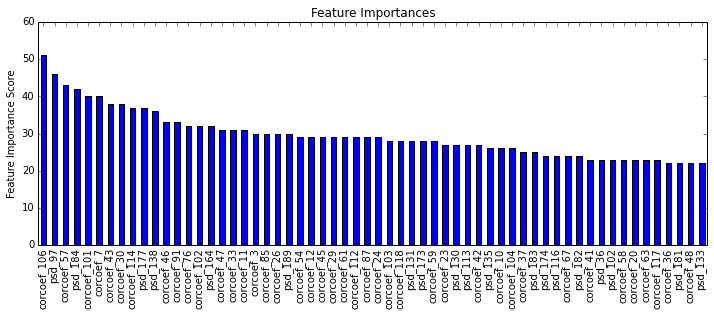

In [3]:
mx_depth=9
algo_xgbm = xgb.XGBClassifier(base_score=0.5, colsample_bytree=0.5, 
                               gamma=0.017,learning_rate=0.15, max_delta_step=0, 
                               max_depth=mx_depth, min_child_weight=3, n_estimators=3000, 
                               nthread=-1, objective='binary:logistic', seed=0, 
                               silent=1, subsample=0.9)

algo_=algo_xgbm

print 'Running:' + str(algo_) + 'shape:' + str(X_df_train_SINGLE.shape)
X_df_train= pd.read_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
                  + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)

X_df_train_SINGLE=X_df_train.copy(deep=True)
X_df_train_SINGLE = dropBadFiles(X_df_train_SINGLE)

# X_df_train_SINGLE=X_df_train_SINGLE.sort(['patient_id','segment'], ascending=[True, True])
X_df_train_SINGLE=X_df_train_SINGLE.sort(['patient_id'], ascending=[True])

answers_1_SINGLE = list (X_df_train_SINGLE[singleResponseVariable].values)
answers_1_SINGLE= map(int, answers_1_SINGLE)
X_df_train_SINGLE = X_df_train_SINGLE.drop(singleResponseVariable, axis=1)
X_df_train_SINGLE.drop('id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file', axis=1, inplace=True)
X_df_train_SINGLE.drop('patient_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file_size', axis=1, inplace=True)
X_df_train_SINGLE.drop('sequence_id', axis=1, inplace=True)
# X_df_train_SINGLE.drop('segment', axis=1, inplace=True)

X_df_train_SINGLE=X_df_train_SINGLE[last_cols]

X_df_train_SINGLE=X_df_train_SINGLE.apply(lambda x: pandas.to_numeric(x, errors='ignore'))


trainX, testX, trainY, testY = train_test_split(X_df_train_SINGLE, answers_1_SINGLE, test_size=.22)  # CV
model_train = algo_.fit(trainX, trainY, early_stopping_rounds=200,eval_metric="auc", eval_set=[(testX, testY)], 
                            verbose=False)
# print model_train
predictions = algo_.predict_proba(testX)[:, 1]

print 'ROC AUC:' + str(roc_auc_score(testY, predictions))
print 'LOG LOSS:' + str(log_loss(testY, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('LOG_LOSS=' + str(log_loss(testY, predictions)))
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.6f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


feat_imp2 = pd.Series(algo_.booster().get_fscore()).sort_values(ascending=False)
feat_imp2= feat_imp2.head(60) # display only 60
feat_imp2.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

# Build pasty expression -- feed best features automatically 
glm_factor = pd.Series(algo_.booster().get_fscore()).sort_values(ascending=False)
glm_factor= glm_factor.head(240)
glm_factor=list(glm_factor.index)
X_df_train_SINGLE.head(3)

In [8]:
def get_best_estimator_by_grid_search(train_X, train_y, modelType):
    params_lr = {'penalty': ['l2'], 'C': [1,2,5,10,50,500,5000],
                 'solver': ['newton-cg'],
                 'fit_intercept': [False, True]}
    model_lg = LogisticRegression()

    if modelType=='lr':
        method=model_lg
        params=params_lr
    print 'running grid:' + str(params)

    gscv = grid_search.GridSearchCV(method, params, scoring='roc_auc', cv=4)
    gscv.fit(train_X, train_y)
    for params, mean_score, all_scores in gscv.grid_scores_:
        print('{:.6f} (+/- {:.6f}) for {}'.format(mean_score, all_scores.std() / 2, params))
    print('params:{params}'.format(params=gscv.best_params_))
    print('score:{params}'.format(params=gscv.best_score_))
    return gscv.best_params_


X_df_train= pd.read_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
                  + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)

X_df_train_SINGLE=X_df_train.copy(deep=True)

X_df_train_SINGLE=dropBadFiles(X_df_train_SINGLE)

X_df_train_SINGLE=X_df_train_SINGLE.sort(['id'], ascending=[True])
X_df_train_SINGLE=X_df_train_SINGLE.sort(['patient_id','sequence_id'], ascending=[True,True])

answers_1_SINGLE = list (X_df_train_SINGLE[singleResponseVariable].values)
answers_1_SINGLE= map(int, answers_1_SINGLE)

X_df_train_SINGLE.drop('id', axis=1, inplace=True)



X_df_train_SINGLE.drop('file', axis=1, inplace=True)
X_df_train_SINGLE.drop('patient_id', axis=1, inplace=True)
# X_df_train = X_df_train.loc[X_df_train['file_size'] > 2000000]
X_df_train_SINGLE.drop('file_size', axis=1, inplace=True)
X_df_train_SINGLE.drop('sequence_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('segment', axis=1, inplace=True)

X_df_train_SINGLE = X_df_train_SINGLE.drop(singleResponseVariable, axis=1)
X_df_train_SINGLE=X_df_train_SINGLE[last_cols]
X_df_train_SINGLE=X_df_train_SINGLE[glm_factor]
X_df_train_SINGLE=X_df_train_SINGLE.apply(lambda x: pandas.to_numeric(x, errors='ignore'))

i=0
i=i+1
r_state=87*14*36*i
trainX, testX, trainY, testY = train_test_split(X_df_train_SINGLE, answers_1_SINGLE, test_size=.22, 
                                                random_state=r_state)  # CV, 14, 19, 39  
lr_best_params_x=get_best_estimator_by_grid_search(trainX, trainY,'lr')
lr_x=LogisticRegression(**lr_best_params_x)
clf=lr_x
scores = cross_val_score(estimator=clf,X=trainX,y=trainY,cv=5,scoring='roc_auc')
print("ROC AUC: %0.6f (+/- %0.6f)"% (scores.mean(), scores.std()))
clf.fit(trainX,y=trainY)
roc_auc=(scores.mean())

(5971, 1239)
Start shape:(5971, 1239)
Final shape:(4699, 1239)
running grid:{'penalty': ['l2'], 'C': [1, 2, 5, 10, 50, 500, 5000], 'fit_intercept': [False, True], 'solver': ['newton-cg']}
0.849128 (+/- 0.008639) for {'penalty': 'l2', 'C': 1, 'solver': 'newton-cg', 'fit_intercept': False}
0.850383 (+/- 0.008314) for {'penalty': 'l2', 'C': 1, 'solver': 'newton-cg', 'fit_intercept': True}
0.857388 (+/- 0.008806) for {'penalty': 'l2', 'C': 2, 'solver': 'newton-cg', 'fit_intercept': False}
0.858499 (+/- 0.008278) for {'penalty': 'l2', 'C': 2, 'solver': 'newton-cg', 'fit_intercept': True}
0.864502 (+/- 0.009538) for {'penalty': 'l2', 'C': 5, 'solver': 'newton-cg', 'fit_intercept': False}
0.864812 (+/- 0.009367) for {'penalty': 'l2', 'C': 5, 'solver': 'newton-cg', 'fit_intercept': True}
0.867050 (+/- 0.010623) for {'penalty': 'l2', 'C': 10, 'solver': 'newton-cg', 'fit_intercept': False}
0.867304 (+/- 0.010376) for {'penalty': 'l2', 'C': 10, 'solver': 'newton-cg', 'fit_intercept': True}
0.8657

## Features

### psd  + KURT + var +corcoef + median
ROC AUC: 0.817423 (+/- 0.023257) [LR1]*********
ROC AUC: 0.810907 (+/- 0.024663) [LR2]
ROC AUC: 0.781563 (+/- 0.031013) [LR3]
ROC AUC: 0.800804 (+/- 0.038072) [LR4]
ROC AUC: 0.796342 (+/- 0.022608) [ALL_ENS]

### psd  + KURT + var +corcoef
{'penalty': 'l2', 'C': 10, 'solver': 'newton-cg', 'fit_intercept': True}
0.807263379102
ROC AUC: 0.812506 (+/- 0.026137) [LR1]********
ROC AUC: 0.810282 (+/- 0.023861) [LR2]
ROC AUC: 0.776964 (+/- 0.029911) [LR4]
ROC AUC: 0.806641 (+/- 0.029127) [ALL_ENS]

### psd + AR + KURT + var +corcoef
ROC AUC: 0.807254 (+/- 0.014918) [LR1]
ROC AUC: 0.806280 (+/- 0.030300) [LR2]
ROC AUC: 0.786586 (+/- 0.023736) [LR4]
ROC AUC: 0.794156 (+/- 0.020470) [ALL_ENS]

### psd + AR + KURT
ROC AUC: 0.794414 (+/- 0.010521) [LR1]****
ROC AUC: 0.789105 (+/- 0.023595) [LR2]
ROC AUC: 0.783488 (+/- 0.031282) [LR4]
ROC AUC: 0.780297 (+/- 0.032457) [ALL_ENS]

### psd + AR
ROC AUC: 0.789488 (+/- 0.009966) [LR1]
ROC AUC: 0.784948 (+/- 0.027561) [LR2]
ROC AUC: 0.778581 (+/- 0.028699) [LR4]
ROC AUC: 0.787066 (+/- 0.029097) [ALL_ENS]

### psd + var + kurt
ROC AUC: 0.785189 (+/- 0.016801) [LR1]
ROC AUC: 0.779396 (+/- 0.026430) [LR2]
ROC AUC: 0.750319 (+/- 0.036140) [LR3]
ROC AUC: 0.771247 (+/- 0.037228) [LR4]

### psd + kurt
ROC AUC: 0.780672 (+/- 0.017527) [LR1]
ROC AUC: 0.782923 (+/- 0.018995) [LR2]
ROC AUC: 0.761003 (+/- 0.036948) [LR3]
ROC AUC: 0.770550 (+/- 0.041554) [LR4]

### psd + var
ROC AUC: 0.780621 (+/- 0.017502) [LR1]
ROC AUC: 0.776182 (+/- 0.033196) [LR2]
ROC AUC: 0.747264 (+/- 0.024441) [LR3]
ROC AUC: 0.773727 (+/- 0.035969) [LR4]

### psd 
ROC AUC: 0.772800 (+/- 0.015002) [LR1]
ROC AUC: 0.772903 (+/- 0.027478) [LR2]
ROC AUC: 0.750381 (+/- 0.029007) [LR3]
ROC AUC: 0.772003 (+/- 0.037398) [LR4]


### psd + kurt + hurst
ROC AUC: 0.771433 (+/- 0.013203) [LR1]
ROC AUC: 0.773977 (+/- 0.018364) [LR2]
ROC AUC: 0.754705 (+/- 0.035659) [LR3]
ROC AUC: 0.772751 (+/- 0.039318) [LR4]

### psd + hurst
ROC AUC: 0.765666 (+/- 0.014381) [LR1]
ROC AUC: 0.764062 (+/- 0.026495) [LR2]
ROC AUC: 0.739466 (+/- 0.026657) [LR3]
ROC AUC: 0.771631 (+/- 0.034670) [LR4]


## All patients as one submission

In [ ]:
algo_= clf
# algo_= lr3
# algo_=algo_xgbm

ieegFeatures= IeegFeatures(test_dir, False)
df_cols_test=ieegFeatures.ieegGenCols()
print len(df_cols_test)
F_NAME_TEST= TEST_FEAT_BASE + TEST_PREFIX_ALL +'-feat_TEST_df.csv'
X_df_TEST=pandas.read_csv(F_NAME_TEST, engine='python') 
X_df_TEST.drop('Unnamed: 0', axis=1, inplace=True)
X_df_TEST.drop('file', axis=1, inplace=True)
X_df_TEST.drop('patient_id', axis=1, inplace=True)
X_df_TEST.head(3)

#------------------------------------------------------------------------------#
now = datetime.now()
import dis
fld='submission/' + str(datetime.now().strftime("%Y-%m-%d-%H-%M-%S")) +'/'
if not os.path.exists(fld):
    os.makedirs(fld)


# --------------------------------------------------------
    #       PATIENT ID
    # --------------------------------------------------------
def getIdFromFileName(id_str):
    arr = id_str.split("_")
#     print arr
    patient = int(arr[1])
#     print patient
    p_id_str = str(arr[2])
#     print p_id_str
    p_id = int((p_id_str)[:-4])
#     print p_id
    new_id = [patient * 100000 + p_id]
    return new_id    
    
sub_file = fld + 'submission_' + str(roc_auc) + '_'  + (str(algo_))[0:12] + '_'  + str(len(last_cols)) +'_feat_' + '.csv'
# sub_file = fld + 'submission_' + str(.73) + '_'  + (str(algo_))[0:12] + '_'  + '.csv'
r= pandas.DataFrame.from_csv('sample_submission.csv')
print('Writing submission: ', sub_file)
f = open(sub_file, 'w') # append mode
f.write('File,Class\n')

total = 0
for index, row in r.iterrows():            
    id_str= index     
    arr = id_str.split("_")
    patient = int(arr[1])        
    new_id= getIdFromFileName(id_str) 
#     print str(new_id)
    
    X_df_single_row=X_df_TEST.loc[X_df_TEST['id'] == new_id]
#     print X_df_single_row
    X_df_single_row.drop('id', axis=1, inplace=True)
    X_df_single_row=X_df_single_row[last_cols]
    X_df_single_row=X_df_single_row[glm_factor]
    pred_X_df_single_row= algo_.predict_proba(X_df_single_row)    
    c_pred=pred_X_df_single_row[:, 1] # is the probability of the label being 1 
#         print c_pred
    str1 = id_str + ',' + str(c_pred[0]) + '\n'                
    
    f.write(str1)
    
f.close()

print('Done writing submission: ', sub_file)

Starting:ieegFeatures:2016-11-11 11:42:35.817546
Cols:1235
1235
('Writing submission: ', 'submission/2016-11-11-11-42-37/submission_0.861147252029_LogisticRegr_328_feat_.csv')


In [8]:
print last_cols

['psd_1', 'psd_2', 'psd_3', 'psd_4', 'psd_5', 'psd_6', 'psd_7', 'psd_8', 'psd_9', 'psd_10', 'psd_11', 'psd_12', 'psd_13', 'psd_14', 'psd_15', 'psd_16', 'psd_17', 'psd_18', 'psd_19', 'psd_20', 'psd_21', 'psd_22', 'psd_23', 'psd_24', 'psd_25', 'psd_26', 'psd_27', 'psd_28', 'psd_29', 'psd_30', 'psd_31', 'psd_32', 'psd_33', 'psd_34', 'psd_35', 'psd_36', 'psd_37', 'psd_38', 'psd_39', 'psd_40', 'psd_41', 'psd_42', 'psd_43', 'psd_44', 'psd_45', 'psd_46', 'psd_47', 'psd_48', 'psd_49', 'psd_50', 'psd_51', 'psd_52', 'psd_53', 'psd_54', 'psd_55', 'psd_56', 'psd_57', 'psd_58', 'psd_59', 'psd_60', 'psd_61', 'psd_62', 'psd_63', 'psd_64', 'psd_65', 'psd_66', 'psd_67', 'psd_68', 'psd_69', 'psd_70', 'psd_71', 'psd_72', 'psd_73', 'psd_74', 'psd_75', 'psd_76', 'psd_77', 'psd_78', 'psd_79', 'psd_80', 'psd_81', 'psd_82', 'psd_83', 'psd_84', 'psd_85', 'psd_86', 'psd_87', 'psd_88', 'psd_89', 'psd_90', 'psd_91', 'psd_92', 'psd_93', 'psd_94', 'psd_95', 'psd_96', 'psd_97', 'psd_98', 'psd_99', 'psd_100', 'psd_10

In [9]:
#Store LR coeefs
lr_coeefs=algo_.coef_
lr_intercept=algo_.intercept_
# print lr_coeefs
# print lr_intercept

from sklearn.externals import joblib
# # Coeefs
ml_coffes_file=fld + 'mlb_stats-' + str(roc_auc) + '.pkl'
joblib.dump(algo_.coef_,ml_coffes_file, compress=9) 
# #Intercept
ml_intercept_file=fld + 'mlb_intercept-' + str(roc_auc) + '.pkl'
joblib.dump(algo_.intercept_,ml_intercept_file, compress=9) 

#Coeef names
glm_factor2_file=fld + 'glm_factor2-' + str(roc_auc) + '.pkl'
joblib.dump(glm_factor,glm_factor2_file, compress=9)

['submission/2016-10-03-14-11-12/glm_factor2-0.778038948618.pkl']

## Feature importance version two: Features selection on (Logistic Newton)    

In [ ]:
# https://gist.github.com/QuantScientist/f38fe82c2797e30e90d0edce6518d0dc

import pandas as pd
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.cross_validation import cross_val_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
%matplotlib inline

X_df_train= pd.read_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
                  + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)

X_df_train_SINGLE=X_df_train.copy(deep=True)
answers_1_SINGLE = list (X_df_train_SINGLE[singleResponseVariable].values)
answers_1_SINGLE= map(int, answers_1_SINGLE)
X_df_train_SINGLE = X_df_train_SINGLE.drop(singleResponseVariable, axis=1)
X_df_train_SINGLE.drop('id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file', axis=1, inplace=True)
X_df_train_SINGLE.drop('patient_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file_size', axis=1, inplace=True)
X_df_train_SINGLE.drop('sequence_id', axis=1, inplace=True)
# X_df_train_SINGLE.drop('segment', axis=1, inplace=True)
X_df_train_SINGLE=X_df_train_SINGLE.apply(lambda x: pandas.to_numeric(x, errors='ignore'))


trainX, testX, trainY, testY = train_test_split(X_df_train_SINGLE, answers_1_SINGLE, test_size=.33)  # CV
clf1 = LogisticRegression(class_weight='balanced', solver='newton-cg', C=100.0, random_state=17)

import mlxtend
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.cross_validation import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import plot_sequential_feature_selection as plot_sfs

trainX=trainX.apply(lambda x: pandas.to_numeric(x, errors='ignore'))
trainX.head(3)

# This takes 12 hours to run
sfs1 = SFS(clf1, 
           k_features=120, 
           forward=True, 
           floating=False, 
           scoring='roc_auc',
           cv=5)
sfs1 = sfs1.fit(trainX.values, trainY)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

glm_factor=list([0, 1, 2, 643, 4, 645, 646, 7, 9, 138, 12, 529, 3, 22, 663, 25, 667, 670, 5, 676, 6, 550, 296, 684, 46, 304, 49, 50, 53, 311, 56, 314, 315, 700, 62, 63, 705, 453, 744, 89, 339, 85, 36, 608, 97, 611, 102, 614, 615, 232, 617, 107, 110, 112, 616, 467, 629, 630, 119, 121])

X_df_train_FNAMES=X_df_train_FNAMES.iloc[:,glm_factor] # Thorw away
X_df_train_FNAMES.head(3)
glm_factor=X_df_train_FNAMES.columns.values # only need this
glm_factor

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
dirToInclude=parentdir +'/features/'
print dirToInclude
sys.path.insert(0,dirToInclude) 

import IeegConsts
from IeegConsts import *
from IeegFeatures import *

import pandas
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
import matplotlib.pyplot as plt
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import pandas
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
# #http://rcarneva.github.io/understanding-gradient-boosting-part-1.html
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

#-------------------------MLEXTND-------------------------------#
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

     
X_df_train= pd.read_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
                  + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)

X_df_train_SINGLE=X_df_train.copy(deep=True)
answers_1_SINGLE = list (X_df_train_SINGLE[singleResponseVariable].values)
answers_1_SINGLE= map(int, answers_1_SINGLE)
X_df_train_SINGLE.drop('id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file', axis=1, inplace=True)
X_df_train_SINGLE.drop('patient_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file_size', axis=1, inplace=True)
X_df_train_SINGLE.drop('sequence_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('segment', axis=1, inplace=True)
# ieegFeatures= IeegFeatures(train_dir, True)
# trainX, testX, trainY, testY, lr2, roc_auc1= ieegFeatures.singlePatientLRModel(X_df_train_SINGLE, withGrid=True)
# X_df_train_SINGLE.drop('segment', axis=1, inplace=True)
X_df_train_SINGLE = X_df_train_SINGLE.drop(singleResponseVariable, axis=1)
# X_df_train_SINGLE=X_df_train_SINGLE[glm_factor]
X_df_train_SINGLE=X_df_train_SINGLE.apply(lambda x: pandas.to_numeric(x, errors='ignore'))

trainX, testX, trainY, testY = train_test_split(X_df_train_SINGLE, answers_1_SINGLE, test_size=.22)  # CV

#------------------------EnsembleVoteClassifier-----------------------#        
mx_depth=9
xg = xgb.XGBClassifier(base_score=0.5, colsample_bytree=0.5, 
                               gamma=0.017,learning_rate=0.15, max_delta_step=0, 
                               max_depth=mx_depth, min_child_weight=3, n_estimators=3000, 
                               nthread=-1, objective='binary:logistic', seed=0, 
                               silent=1, subsample=0.9)
# lr_best_params={'penalty': 'l2', 'C': 20, 'solver': 'lbfgs', 'fit_intercept': True}

lr_best_params1={'penalty': 'l2', 'C': 500, 'solver': 'newton-cg', 'fit_intercept': False}
# 0.744381687234

lr_best_params2={'penalty': 'l2', 'C': 500, 'solver': 'newton-cg', 'fit_intercept': True}
#0.772866993075

lr1= LogisticRegression(**lr_best_params1)
lr2= LogisticRegression(**lr_best_params2)
lr3=LogisticRegression()
gb=GradientBoostingClassifier()
rf=RandomForestClassifier()
et=ExtraTreesClassifier()


import numpy as np

from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


def logloss(attempt, actual, epsilon=1.0e-15):
    """Logloss, i.e. the score of the bioresponse competition.
    """
    attempt = np.clip(attempt, epsilon, 1.0-epsilon)
    return - np.mean(actual * np.log(attempt) +(1.0 - actual) * np.log(1.0 - attempt))    

np.random.seed(0)  # seed to shuffle the train set
n_folds = 3
verbose = True
shuffle = False

ieegFeatures= IeegFeatures(test_dir, False)
df_cols_test=ieegFeatures.ieegGenCols()
print len(df_cols_test)
F_NAME_TEST= TEST_FEAT_BASE + TEST_PREFIX_ALL +'-feat_TEST_df.csv'
X_df_TEST=pandas.read_csv(F_NAME_TEST, engine='python') 
X_df_TEST.drop('Unnamed: 0', axis=1, inplace=True)
X_df_TEST.drop('file', axis=1, inplace=True)
X_df_TEST.drop('patient_id', axis=1, inplace=True)
X_df_TEST.drop('id', axis=1, inplace=True)
X_df_TEST.head(3)

X_df_train_SINGLE= X_df_train_SINGLE.as_matrix()
X_df_TEST= X_df_TEST.as_matrix()
import numpy as np
answers_1_SINGLE = np.asarray(answers_1_SINGLE)

X, y, X_submission = X_df_train_SINGLE, answers_1_SINGLE, X_df_TEST

if shuffle:
    idx = np.random.permutation(y.size)
    X = X[idx]
    y = y[idx]
    
skf = list(StratifiedKFold(y, n_folds))
clfs=list([lr1,lr2])

print "Creating train and test sets for blending."

dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_submission.shape[0], len(clfs)))

for j, clf in enumerate(clfs):
    print j, clf
    dataset_blend_test_j = np.zeros((X_submission.shape[0], len(skf)))
    for i, (train, test) in enumerate(skf):        
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
        clf.fit(X_train, y_train)
        y_submission = clf.predict_proba(X_test)[:, 1]
        print y_submission.shape
        scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
        roc_acu=scores.mean()
        print("ROC_AUC: %0.8f (+/- %0.8f) [%s]" % (roc_acu, scores.std(), i))      
        
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_submission)[:, 1]
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)

print
print "Blending."
clf = LogisticRegression()
# print dataset_blend_train
clf.fit(dataset_blend_train, y)
y_submission = clf.predict_proba(dataset_blend_test)[:, 1]

print "Linear stretch of predictions to [0,1]"
y_submission = (y_submission - y_submission.min()) / (y_submission.max() - y_submission.min())

print "Saving Results."
tmp = np.vstack([range(1, len(y_submission)+1), y_submission]).T
np.savetxt(fname='submission_ens.csv', X=tmp, fmt='%d,%0.9f',header='File,Class', comments='')

/Volumes/3pt-enc/db/Dropbox/dev/books/mf-msc/mcmc2/seizure-33/python/features/


NameError: name 'test_dir' is not defined

## Best weights

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import os

X_df_train= pd.read_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
                  + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)

X_df_train_SINGLE=X_df_train.copy(deep=True)
labels = X_df_train_SINGLE[singleResponseVariable]
answers_1_SINGLE = (X_df_train_SINGLE[singleResponseVariable].values)

X_df_train_SINGLE.drop('id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file', axis=1, inplace=True)
X_df_train_SINGLE.drop('patient_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file_size', axis=1, inplace=True)
X_df_train_SINGLE.drop('sequence_id', axis=1, inplace=True)

# X_df_train_SINGLE.drop('segment', axis=1, inplace=True)
X_df_train_SINGLE = X_df_train_SINGLE.drop(singleResponseVariable, axis=1)

# X_df_train_SINGLE=X_df_train_SINGLE[glm_factor]
X_df_train_SINGLE=X_df_train_SINGLE.apply(lambda x: pandas.to_numeric(x, errors='ignore'))

mx_depth=9
xg = xgb.XGBClassifier(base_score=0.5, colsample_bytree=0.5, 
                               gamma=0.017,learning_rate=0.15, max_delta_step=0, 
                               max_depth=mx_depth, min_child_weight=3, n_estimators=3000, 
                               nthread=-1, objective='binary:logistic', seed=0, 
                               silent=1, subsample=0.9)
# lr_best_params={'penalty': 'l2', 'C': 20, 'solver': 'lbfgs', 'fit_intercept': True}
lr_best_params1={'penalty': 'l2', 'C': 500, 'solver': 'newton-cg', 'fit_intercept': False}
# 0.744381687234
lr_best_params2={'penalty': 'l2', 'C': 500, 'solver': 'newton-cg', 'fit_intercept': True}
#0.772866993075

lr1= LogisticRegression(**lr_best_params1)
lr2= LogisticRegression(**lr_best_params2)
lr3=LogisticRegression()
gb=GradientBoostingClassifier()
rf=RandomForestClassifier()
et=ExtraTreesClassifier()


#-------------------------------------------------------------
train=X_df_train_SINGLE.copy(deep=True)
sss = StratifiedShuffleSplit(labels, test_size=0.05, random_state=1234)
for train_index, test_index in sss:
    break

train_x, train_y = train.values[train_index], labels.values[train_index]
test_x, test_y = train.values[test_index], labels.values[test_index]

clfs_list = []

labels = ['LR1', 'LR2', 'LR3']
clfs=list([lr1, lr2, lr3])

for clf, label in zip(clfs, labels):    
    scores = cross_validation.cross_val_score(clf, train_x, train_y, cv=5, scoring='roc_auc')
    roc_acu=scores.mean()
    print("ROC_AUC: %0.8f (+/- %0.8f) [%s]" % (roc_acu, scores.std(), label))      
    clf.fit(train_x, train_y)
    print('LogLoss {score}'.format(score=log_loss(test_y, clf.predict_proba(test_x))))
    clfs_list.append(clf)

predictions = []
for clf in clfs_list:
    predictions.append(clf.predict_proba(test_x))

def log_loss_func(weights):
    ''' scipy minimize will pass the weights as a numpy array '''
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction

    return log_loss(test_y, final_prediction)
    
starting_values = [0.5]*len(predictions)

cons = ({'type':'eq','fun':lambda w: 1-sum(w)})
bounds = [(0,1)]*len(predictions)

res = minimize(log_loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print('Ensamble Score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))